In [129]:
from spuco.datasets import SpuCoMNIST, SpuriousFeatureDifficulty

import torch, torch.nn as nn

import matplotlib.pyplot as plt

In [106]:
difficulty = SpuriousFeatureDifficulty.MAGNITUDE_LARGE

classes = [[0, 1], [2, 3], [4, 5], [6, 7], [8, 9]]

In [109]:
# Initialize training dataset
trainset = SpuCoMNIST(
    root="data/",
    spurious_feature_difficulty=difficulty,
    spurious_correlation_strength=0.995,
    classes=classes,
    split="train",
    download=True
)
trainset.initialize()

In [ ]:
# Initialize valdidation dataset
valset = SpuCoMNIST(
    root="data/",
    spurious_feature_difficulty=difficulty,
    classes=classes,
    split="val",
    download=True
)
valset.initialize()

In [111]:
# Initialize test dataset
testset = SpuCoMNIST(
    root="data/",
    spurious_feature_difficulty=difficulty,
    classes=classes,
    split="test",
    download=True
)
testset.initialize()

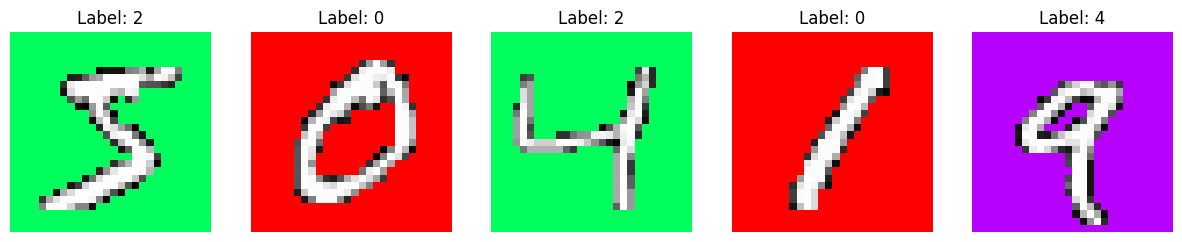

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(15, 5))  # Display 5 images in a row
for i in range(0, 5):
    image, label = trainset[i]
    image = image.permute(1, 2, 0).numpy()  # Rearrange dimensions
    axes[i].imshow(image)
    axes[i].set_title(f"Label: {label}")
    axes[i].axis("off")
plt.show()